In [2]:
#import library penting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
#load dataset
data = pd.read_csv('Stroke Dataset.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
# Menghapus baris yang mengandung nilai NaN
data = data.dropna()

In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
#cek jumlah data dan kolom nya
data.shape

(4909, 12)

# Step EDA

In [7]:
#cek data kosong
data.isnull().values.any()

False

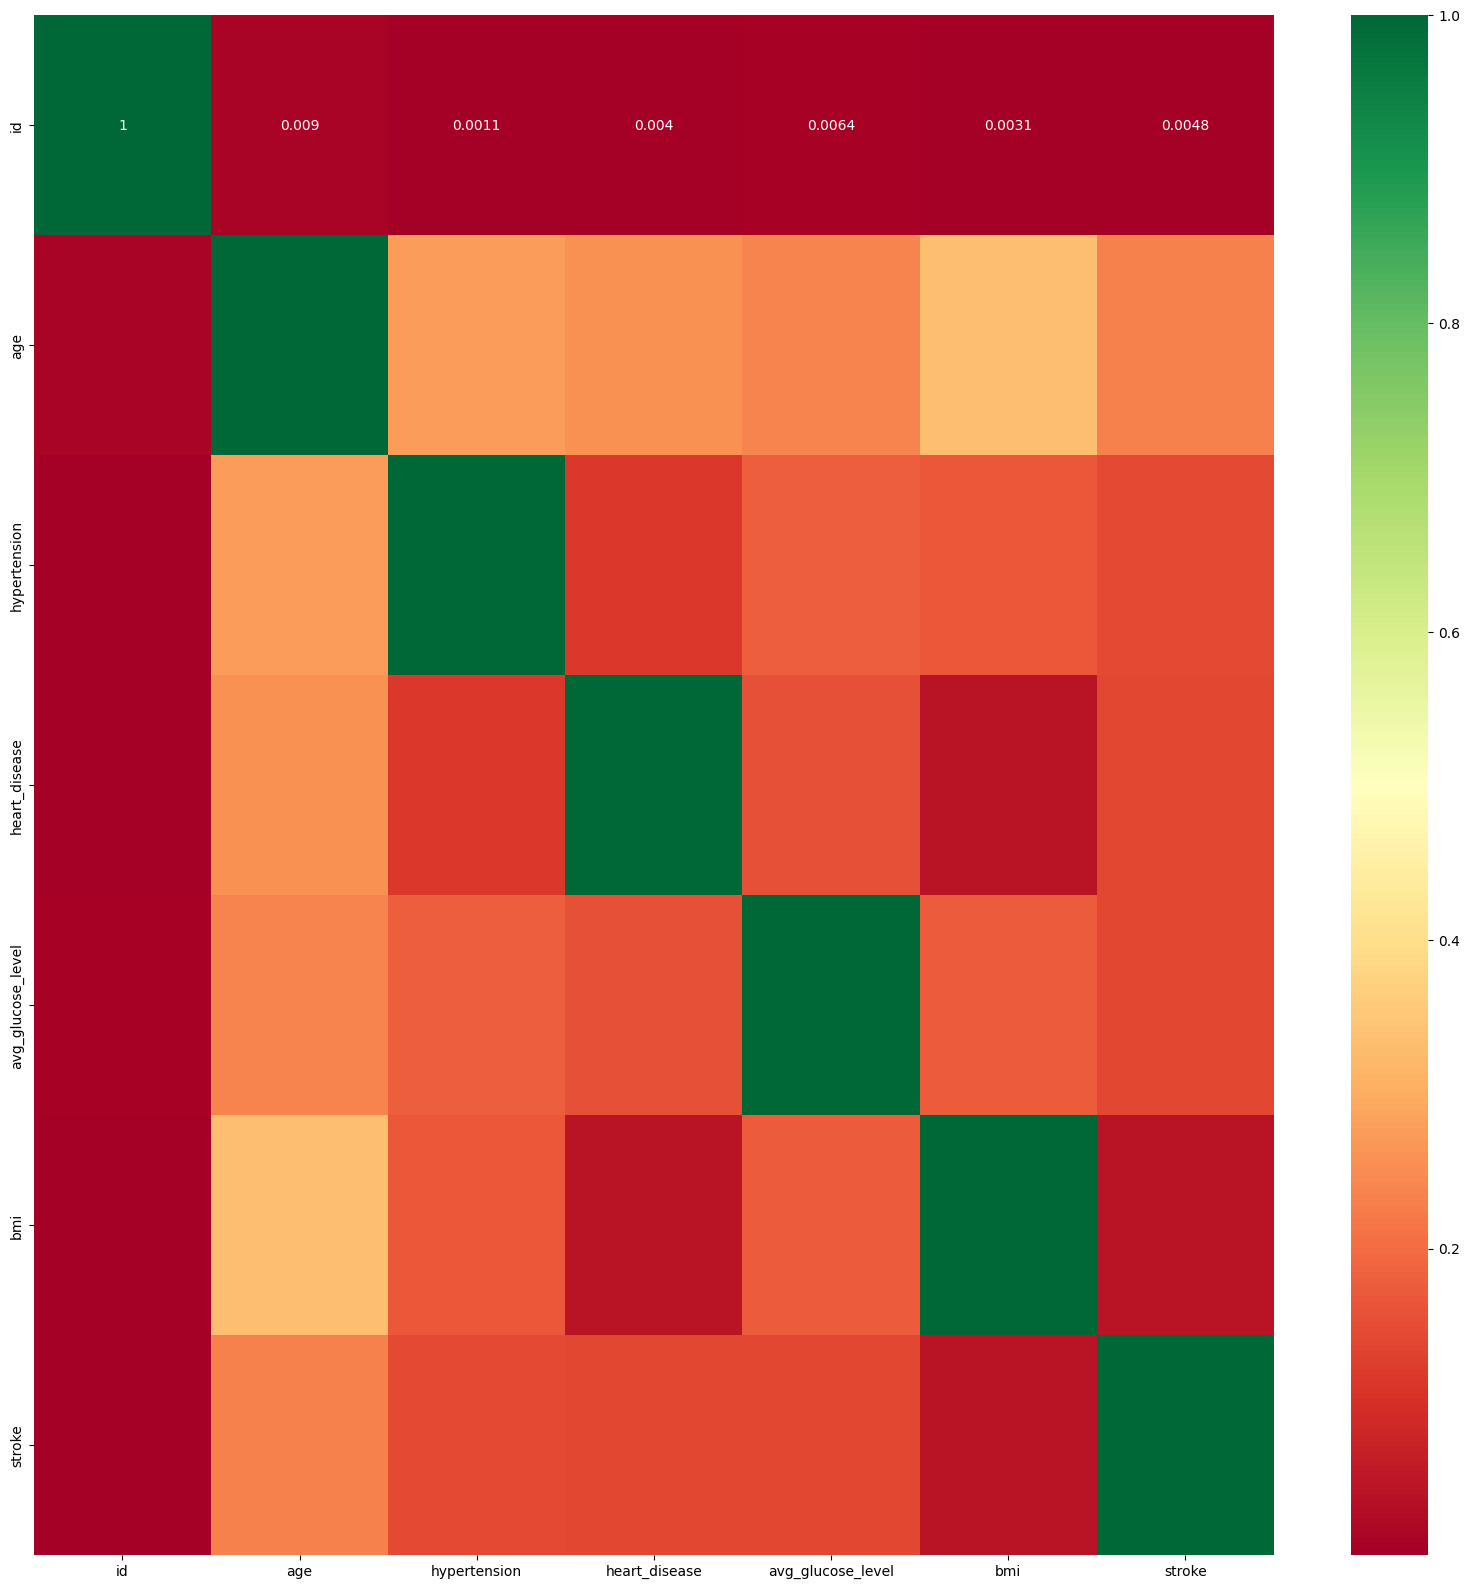

In [8]:
#korelasi menggunakan heat map
import seaborn as sns
data = data.select_dtypes(include=['float64', 'int64'])
korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")

In [9]:
#show corelation in tables
data.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.008984,0.001147,0.004016,0.006409,0.003084,0.004839
age,0.008984,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.001147,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.004016,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.006409,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.004839,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


In [10]:
#statistika dasar
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [11]:
#chechking skewness dari data
stroke_true_count =len(data.loc[data['stroke']==1])
stroke_false_count =len(data.loc[data['stroke']==0])

In [12]:
#view
(stroke_true_count,stroke_false_count)

(209, 4700)

In [13]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of colums : {0}'.format(data.shape[1]))

total number of rows : 4909
total number of colums : 7


In [14]:
data.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [15]:
print('Banyak baris nilai nol untuk id : {0}'.format(len(data.loc[data['id']==0])))
print('Banyak baris nilai nol untuk age : {0}'.format(len(data.loc[data['age']==0])))
print('Banyak baris nilai nol untuk hypertension : {0}'.format(len(data.loc[data['hypertension']==0])))
print('Banyak baris nilai nol untuk heart_disease : {0}'.format(len(data.loc[data['heart_disease']==0])))
print('Banyak baris nilai nol untuk avg_glucose_level : {0}'.format(len(data.loc[data['avg_glucose_level']==0])))
print('Banyak baris nilai nol untuk bmi : {0}'.format(len(data.loc[data['bmi']==0])))
print('Banyak baris nilai nol untuk stroke : {0}'.format(len(data.loc[data['stroke']==0])))

Banyak baris nilai nol untuk id : 0
Banyak baris nilai nol untuk age : 0
Banyak baris nilai nol untuk hypertension : 4458
Banyak baris nilai nol untuk heart_disease : 4666
Banyak baris nilai nol untuk avg_glucose_level : 0
Banyak baris nilai nol untuk bmi : 0
Banyak baris nilai nol untuk stroke : 4700


In [16]:
data2 = data.copy()

In [17]:
#Rata-rata
avg_hypertension  = data2['hypertension'].mean()
avg_heart_disease = data2['heart_disease'].mean()
avg_stroke = data2['stroke'].mean()


In [18]:
#now replace avg to columns
data2['hypertension'].replace({0:avg_hypertension }, inplace=True)
data2['heart_disease'].replace({0:avg_heart_disease }, inplace=True)
data2['stroke'].replace({0:avg_stroke }, inplace=True)


In [19]:
print('Banyak baris nilai nol untuk id : {0}'.format(len(data2.loc[data2['id']==0])))
print('Banyak baris nilai nol untuk age : {0}'.format(len(data2.loc[data2['age']==0])))
print('Banyak baris nilai nol untuk hypertension : {0}'.format(len(data2.loc[data2['hypertension']==0])))
print('Banyak baris nilai nol untuk heart_disease : {0}'.format(len(data2.loc[data2['heart_disease']==0])))
print('Banyak baris nilai nol untuk avg_glucose_level : {0}'.format(len(data2.loc[data2['avg_glucose_level']==0])))
print('Banyak baris nilai nol untuk bmi : {0}'.format(len(data2.loc[data2['bmi']==0])))
print('Banyak baris nilai nol untuk stroke : {0}'.format(len(data2.loc[data2['stroke']==0])))

Banyak baris nilai nol untuk id : 0
Banyak baris nilai nol untuk age : 0
Banyak baris nilai nol untuk hypertension : 0
Banyak baris nilai nol untuk heart_disease : 0
Banyak baris nilai nol untuk avg_glucose_level : 0
Banyak baris nilai nol untuk bmi : 0
Banyak baris nilai nol untuk stroke : 0


c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

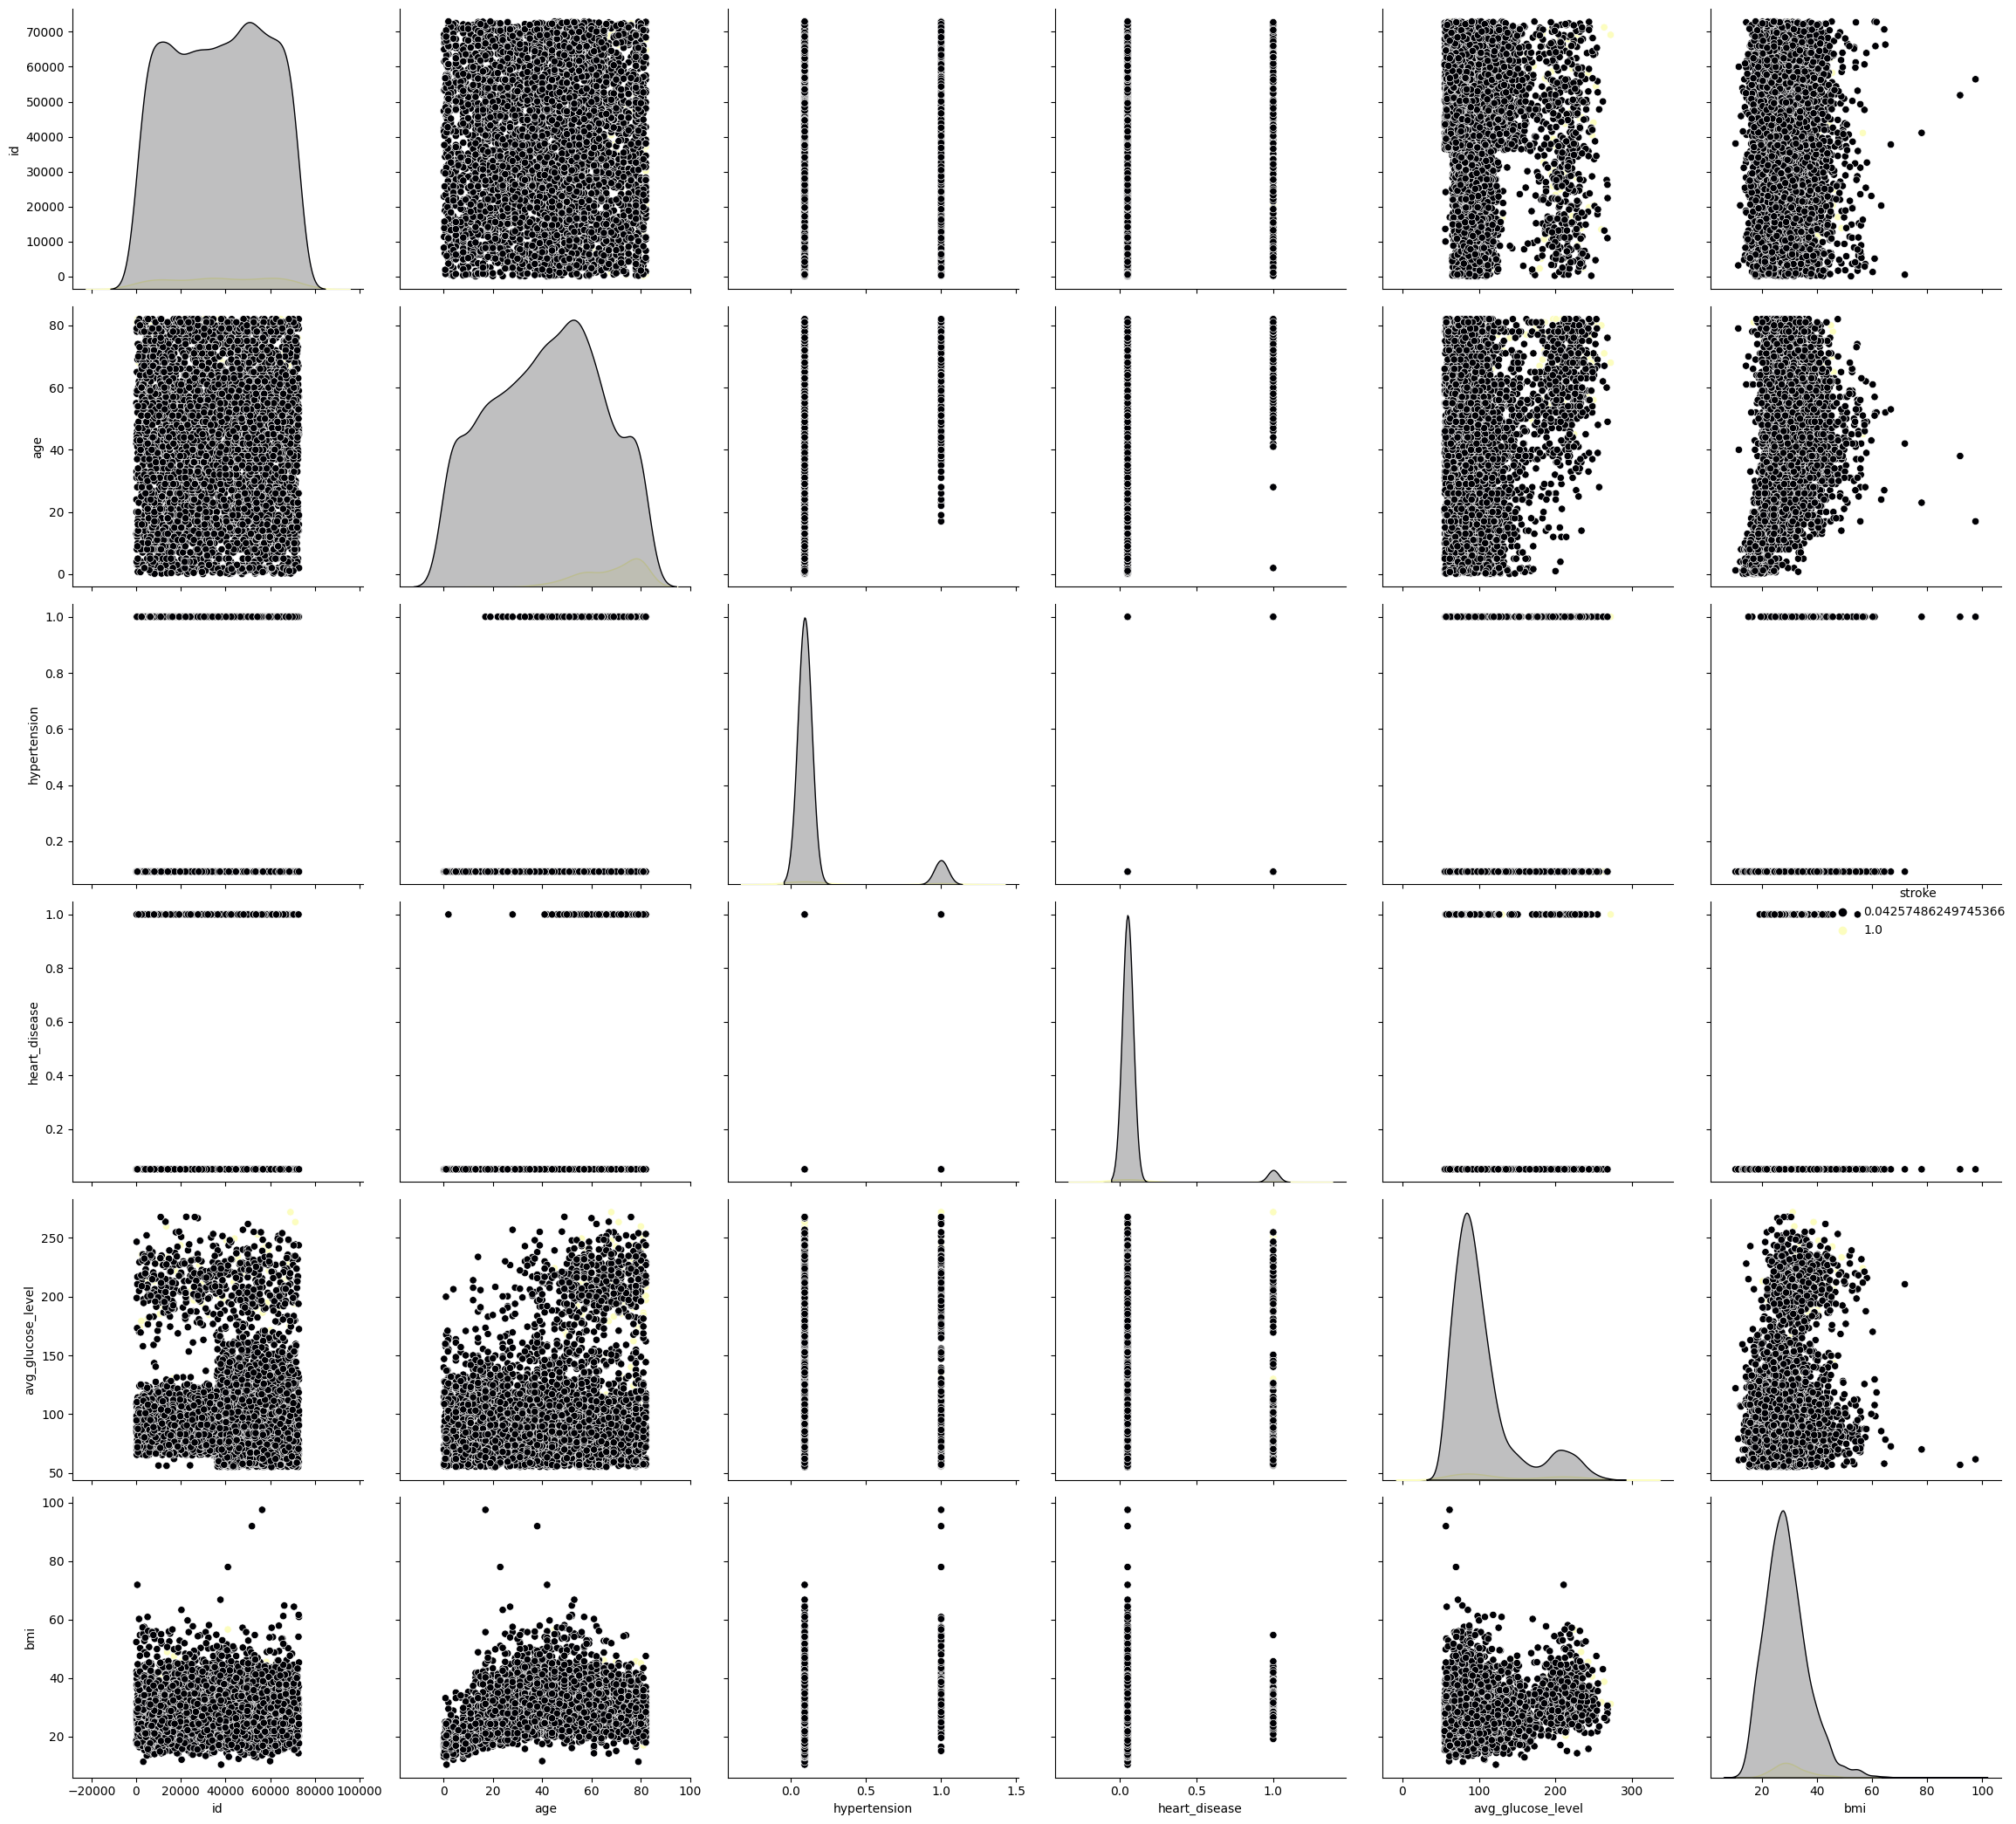

In [20]:
#make pairplot
sns.pairplot(data2,hue='stroke',palette='magma', height = 3.5)
plt.tight_layout()

c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: us

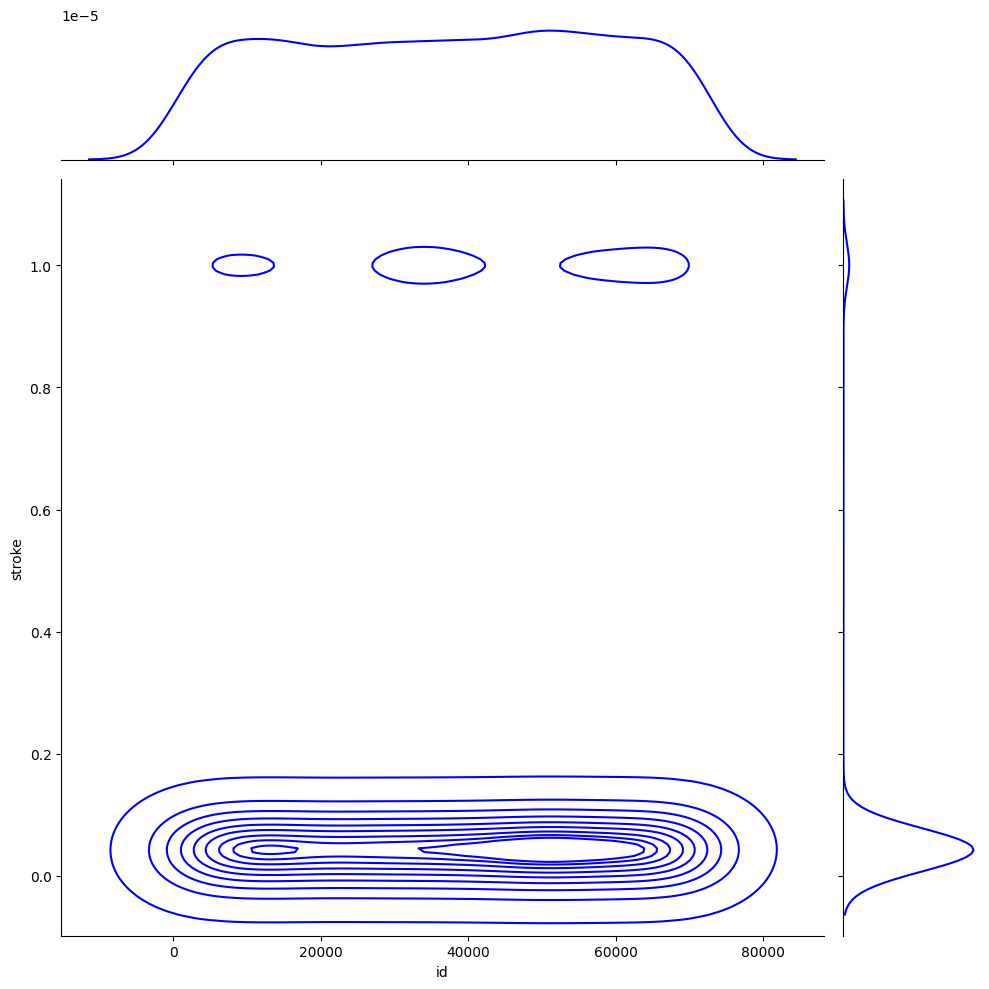

In [21]:
#joinplot
sns.jointplot(x='id', y='stroke', data=data2,height=10,kind='kde',color='blue')
plt.tight_layout()

## Aplly Model

In [22]:
from sklearn.model_selection import train_test_split

x = data2.drop('stroke', axis=1)
y = data2['stroke']

In [23]:
x

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
0,9046,67.0,0.091872,1.000000,228.69,36.6
2,31112,80.0,0.091872,1.000000,105.92,32.5
3,60182,49.0,0.091872,0.049501,171.23,34.4
4,1665,79.0,1.000000,0.049501,174.12,24.0
5,56669,81.0,0.091872,0.049501,186.21,29.0
...,...,...,...,...,...,...
5104,14180,13.0,0.091872,0.049501,103.08,18.6
5106,44873,81.0,0.091872,0.049501,125.20,40.0
5107,19723,35.0,0.091872,0.049501,82.99,30.6
5108,37544,51.0,0.091872,0.049501,166.29,25.6


In [24]:
y

0       1.000000
2       1.000000
3       1.000000
4       1.000000
5       1.000000
          ...   
5104    0.042575
5106    0.042575
5107    0.042575
5108    0.042575
5109    0.042575
Name: stroke, Length: 4909, dtype: float64

In [25]:
#Mengubah data type menjadi int64
y = y.astype('int64')

In [26]:
y

0       1
2       1
3       1
4       1
5       1
       ..
5104    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 4909, dtype: int64

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [28]:
x_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
3565,68302,40.0,0.091872,0.049501,65.77,31.2
898,62716,59.0,0.091872,0.049501,81.64,32.8
2707,46498,57.0,0.091872,0.049501,217.40,36.6
4198,4148,81.0,0.091872,0.049501,71.18,23.9
2746,35315,65.0,0.091872,0.049501,95.88,28.5
...,...,...,...,...,...,...
4613,45530,19.0,0.091872,0.049501,89.30,22.1
511,27832,51.0,0.091872,0.049501,82.93,29.7
3247,64498,53.0,0.091872,0.049501,90.65,22.1
3946,8041,11.0,0.091872,0.049501,93.51,20.8


In [29]:
x_train.shape

(3927, 6)

In [30]:
y_train.shape

(3927,)

In [31]:
x_test

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
4336,53802,80.0,0.091872,1.000000,125.32,32.9
3709,1454,42.0,0.091872,0.049501,84.03,31.4
964,59336,66.0,1.000000,0.049501,74.90,32.1
2647,66264,29.0,0.091872,0.049501,102.40,26.9
3262,14376,47.0,0.091872,0.049501,88.49,22.2
...,...,...,...,...,...,...
1022,60047,22.0,0.091872,0.049501,58.38,36.0
205,51314,78.0,0.091872,0.049501,106.74,33.0
3838,53759,56.0,0.091872,0.049501,122.73,37.5
5010,58635,72.0,0.091872,0.049501,74.17,35.5


In [32]:
y_train

3565    0
898     0
2707    0
4198    0
2746    0
       ..
4613    0
511     0
3247    0
3946    0
916     0
Name: stroke, Length: 3927, dtype: int64

## Training

In [33]:
from sklearn.svm import SVC

SVC_model = SVC()

In [34]:
SVC_model.fit(x_train,y_train)

SVC()

In [35]:
svc_prediction = SVC_model.predict(x_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,svc_prediction))

[[929   0]
 [ 53   0]]


In [37]:
print(classification_report(y_test,svc_prediction))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## SAVE Model

In [38]:
import pickle 
pickle.dump(SVC_model,open('SVC.pkl','wb'))